In [2]:

#  Don't use this in your code, this is just for producing the statistics of the contextual layer alone.

from collections import defaultdict
from numpy import array

from contextual_layer.experiment import make_experiment


payoff_conditions = ["low", "high"]

efficiencies = defaultdict(list)
fairnesses = defaultdict(list)

for payoff in payoff_conditions:
    for n in range(20):
        experiment, task = make_experiment(payoff)
        experiment.run(debug=False, n=100)
        rew_hist = array(experiment.logger.get_log("rew_hist"))
        num_high_rewards = (rew_hist == task.high_rew).astype(float).sum(axis=0)
        efficiency = rew_hist.sum() / (rew_hist.shape[0] * (task.low_rew + task.high_rew))
        fairness = min(num_high_rewards) / max(num_high_rewards)
        efficiencies[payoff].append(efficiency)
        fairnesses[payoff].append(fairness)
        #print efficiencies, fairnesses

Populating the interactive namespace from numpy and matplotlib


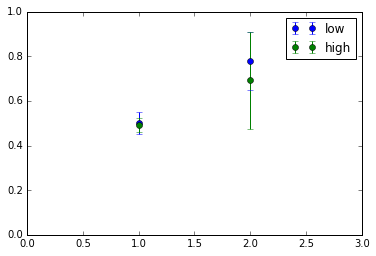

In [3]:
# Plotting stats for efficiency and fairness

%pylab inline
for payoff in payoff_conditions:
    errorbar([1, 2], [mean(efficiencies[payoff]), mean(fairnesses[payoff])], [std(efficiencies[payoff]), std(fairnesses[payoff])], linestyle='None', marker='o')
axis([0, 3, 0, 1])
legend(payoff_conditions)

In [ ]:
# In your code, use the following:

In [1]:
from contextual_layer import ValueLearning, PolicyLearning, ContextualLayer


n_states = 3   # Low, High, Tie
n_actions = 2  # to_the_low, to_the_high
value = ValueLearning(n_states)
policy = PolicyLearning(n_states, n_actions)
contextual_layer = ContextualLayer(value, policy)

In [3]:
state = 1   # High
action = contextual_layer.act(state)
print action
reward = 0.0   # This will be provided by the task
contextual_layer.update(state, reward, action)

0
